In [1]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

# Load IMDb dataset
(vocab_size, maxlen) = (10000, 200)  # Top 10k words, sequences truncated/padded to length 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Print dataset statistics
print(f"Training samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")
print(f"First review (encoded): {x_train[0]}")
print(f"First label: {y_train[0]}")  # 1 = Positive, 0 = Negative

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 11s 1us/step
Training samples: 25000
Testing samples: 25000
First review (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 

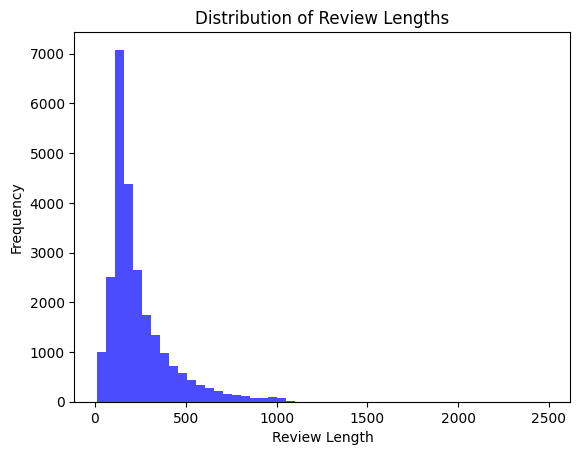

Label counts: {np.int64(0): np.int64(12500), np.int64(1): np.int64(12500)}


In [3]:
# Review length distribution
review_lengths = [len(review) for review in x_train]

plt.hist(review_lengths, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

# Label counts
unique, counts = np.unique(y_train, return_counts=True)
print(f"Label counts: {dict(zip(unique, counts))}")


In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets.imdb import get_word_index

# Pad sequences
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post', truncating='post')

# Decode reviews
word_index = get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

print("Decoded review:", decode_review(x_train[0]))


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step
Decoded review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are am

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 128

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\91959\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 128

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
batch_size = 64
epochs = 10

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 205ms/step - accuracy: 0.5084 - loss: 0.6932 - val_accuracy: 0.5938 - val_loss: 0.6738
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 190ms/step - accuracy: 0.5620 - loss: 0.6752 - val_accuracy: 0.6256 - val_loss: 0.6348
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 104s 261ms/step - accuracy: 0.6618 - loss: 0.6030 - val_accuracy: 0.5694 - val_loss: 0.6949
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 219ms/step - accuracy: 0.6942 - loss: 0.5444 - val_accuracy: 0.7522 - val_loss: 0.5275
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 85s 271ms/step - accuracy: 0.8445 - loss: 0.3811 - val_accuracy: 0.7966 - val_loss: 0.4761
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 74s 237ms/step - accuracy: 0.8837 - loss: 0.2944 - val_accuracy: 0.8210 - val_loss: 0.4426
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 199ms/step - accuracy: 0.9149 - loss: 0.2292 - val_accuracy: 0.8212 - val_loss: 0.4412
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 202ms/step - accuracy: 0.9303 - loss: 

Test Accuracy: 0.82


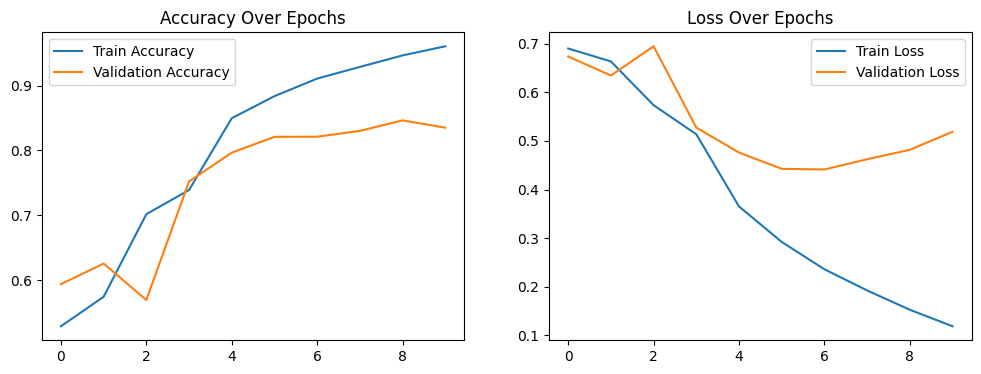

In [8]:
# Evaluate test performance
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Visualize training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.show()


In [9]:
predictions = model.predict(x_test[:5])
for i, prediction in enumerate(predictions):
    print(f"Review: {decode_review(x_test[i])}")
    print(f"Predicted Sentiment: {'Positive' if prediction > 0.5 else 'Negative'}")
    print(f"Actual Sentiment: {'Positive' if y_test[i] == 1 else 'Negative'}")
    print("----")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
Review: ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Predicted Sentiment: Negative
Actual Sentiment: Negative
----
Review: ? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create a